<a href="https://colab.research.google.com/github/HyeranYang/Projects_Senior_IT_Support_Center/blob/master/Standard_Scale%2C_SPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import pandas as pd
import numpy as np
import scipy.stats # 통계 함수 사용
import matplotlib.pyplot as plt
import seaborn as sns

# 스탠다드 스케일러
from sklearn.preprocessing import StandardScaler

# 한글폰트 설정
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 폰트 선명하게
%config InlineBackend.figure_format = 'retina'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 데이터 준비

In [3]:
# 최종 데이터 로드
data = pd.read_excel('/content/drive/MyDrive/PROJECT_senior it support center/데이터/final.xlsx')
data.head()

,구,동,시설명,주변특성,대중교통,디지털정보지수,동별 전체인구,동별 시니어 인구,동별 시니어 비율,연면적
0,종로구,청운효자동,청운효자동 주민센터,0,1,2949.41,11978,2945,0.245867,965.52
1,종로구,사직동,사직동 주민센터,3,1,2408.35,9372,2468,0.263338,346.65
2,종로구,종로1.2.3.4가동,종로1.2.3.4가동 주민센터,4,5,2326.67,7197,2682,0.372655,1981.09
3,종로구,삼청동,삼청동 주민센터,1,3,689.18,2456,827,0.336726,998.10
4,종로구,가회동,가회동 주민센터,1,2,1126.72,4088,1184,0.289628,1032.08


In [4]:
# 숫자형 데이터만 뽑아서 분포보고 스케일링 진행
data_num = data.iloc[:, 3:]
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   주변특성       424 non-null    int64  
 1   대중교통       424 non-null    int64  
 2   디지털정보지수    424 non-null    float64
 3   동별 전체인구    424 non-null    int64  
 4   동별 시니어 인구  424 non-null    int64  
 5   동별 시니어 비율  424 non-null    float64
 6   연면적        424 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.3 KB


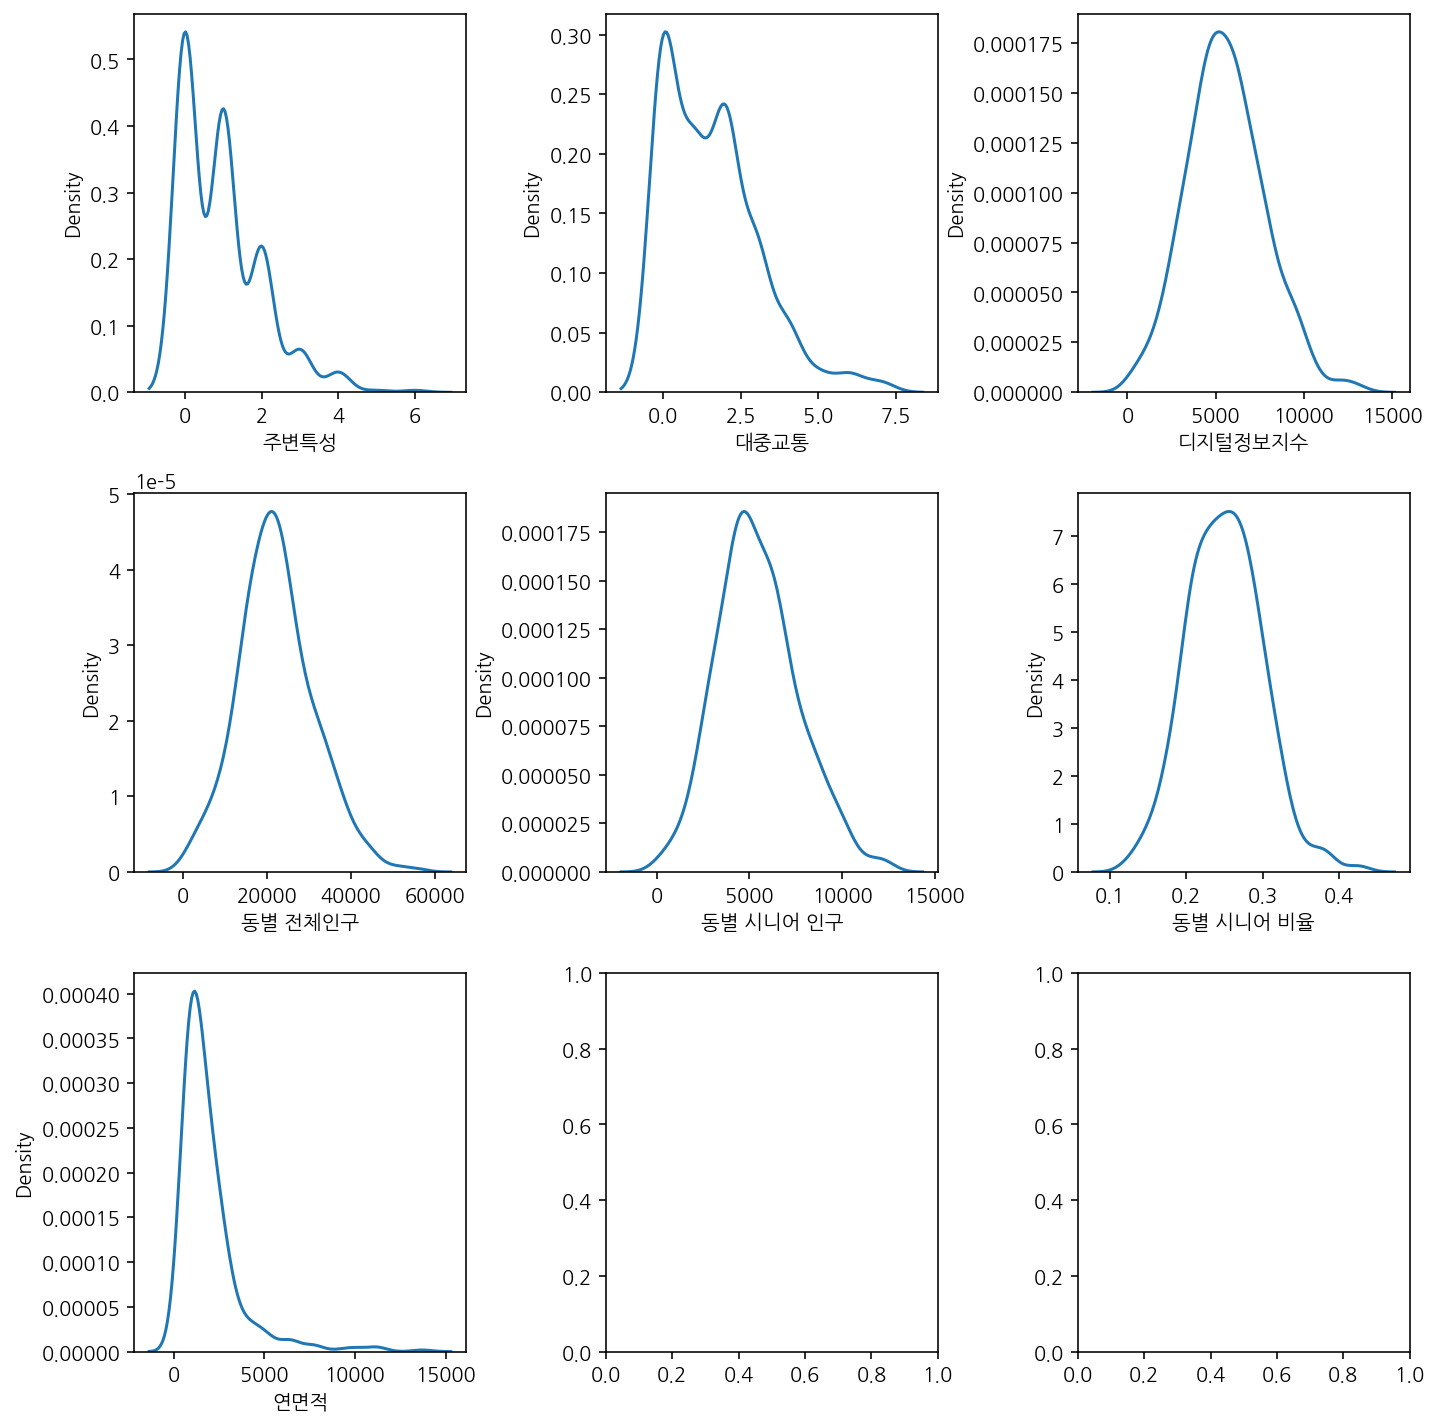

In [5]:
# 연속형 분포확인
fig, ax = plt.subplots(3,3, figsize=(10,10))
for i, valu in enumerate(data_num):
    m = i//3
    n = i % 3
    sns.kdeplot(x =valu, data = data_num, ax=ax[m,n])

plt.tight_layout()
plt.show()

## 변수간 상관관계 확인

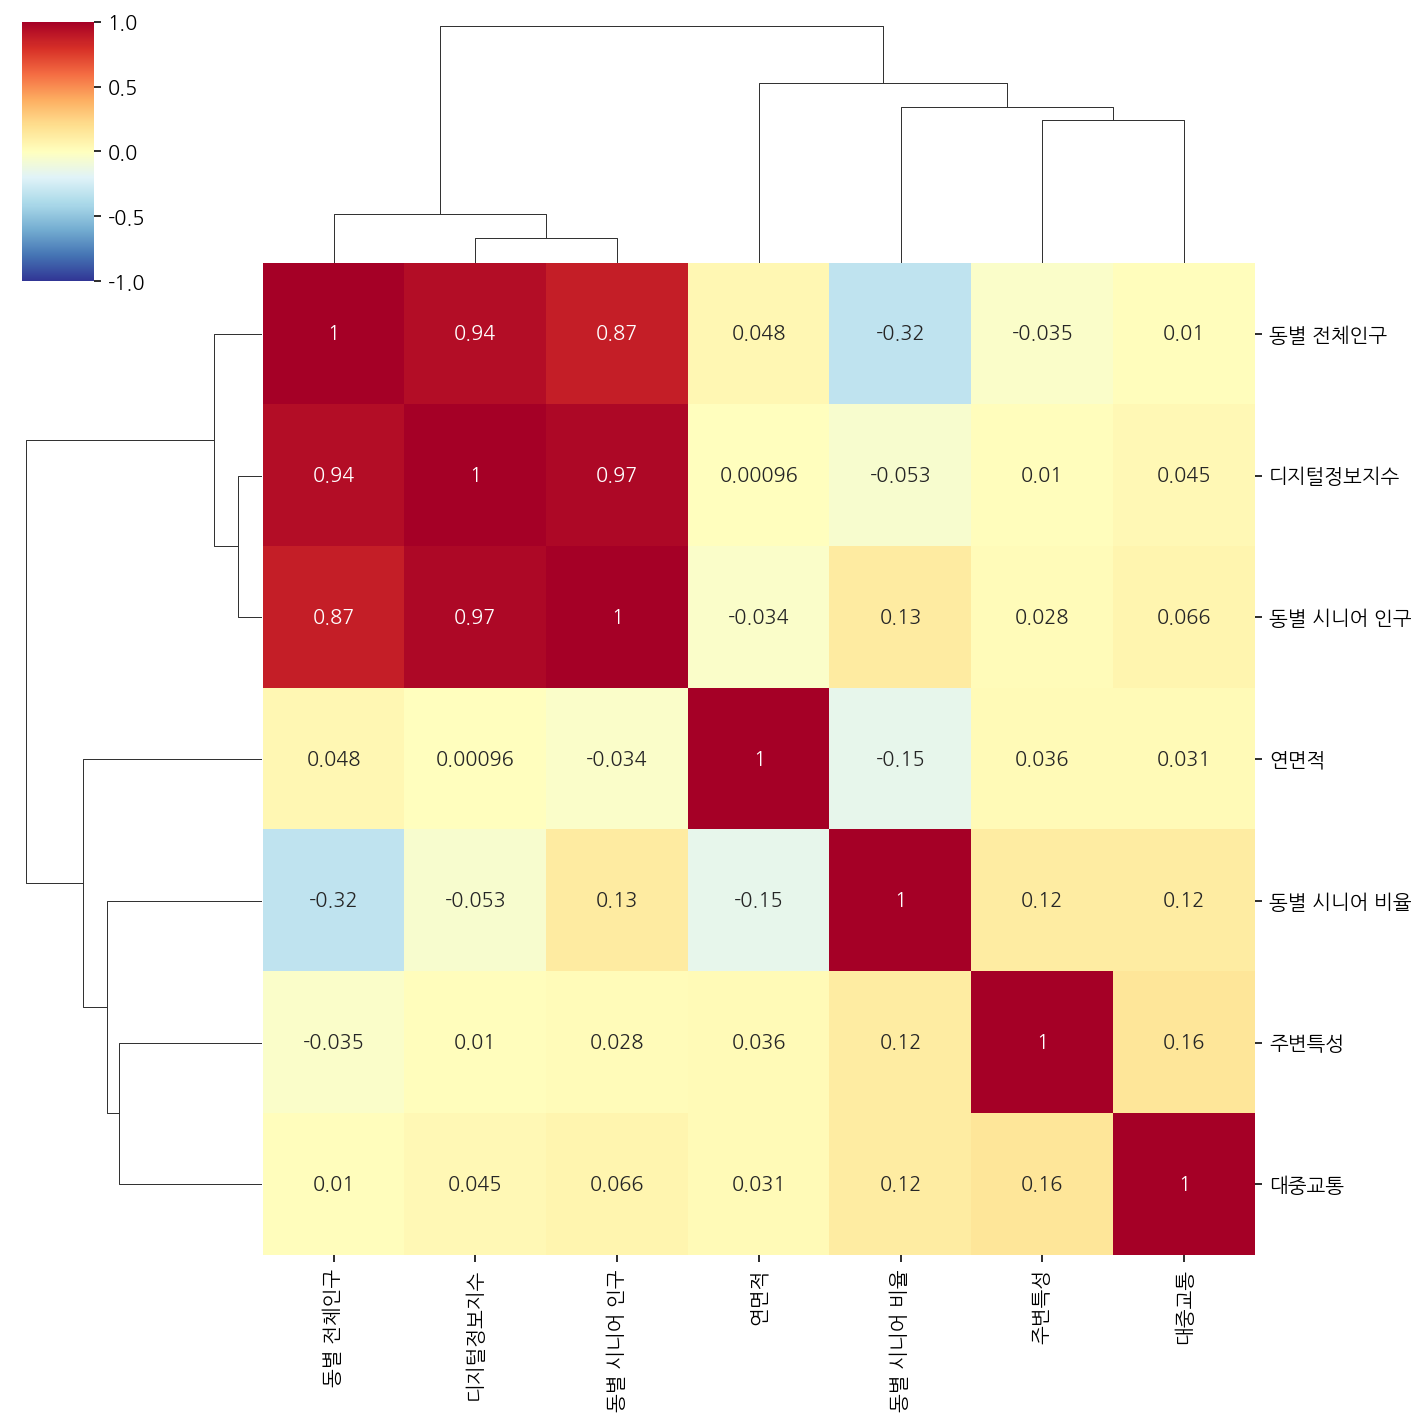

In [8]:
df_corr = data_num.corr()
sns.clustermap(df_corr,
               annot=True,       # 실제 값 화면에 나타내기
               cmap='RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin=-1, vmax=1)  # 컬러차트 -1 ~ 1 범위로 표시
plt.show()

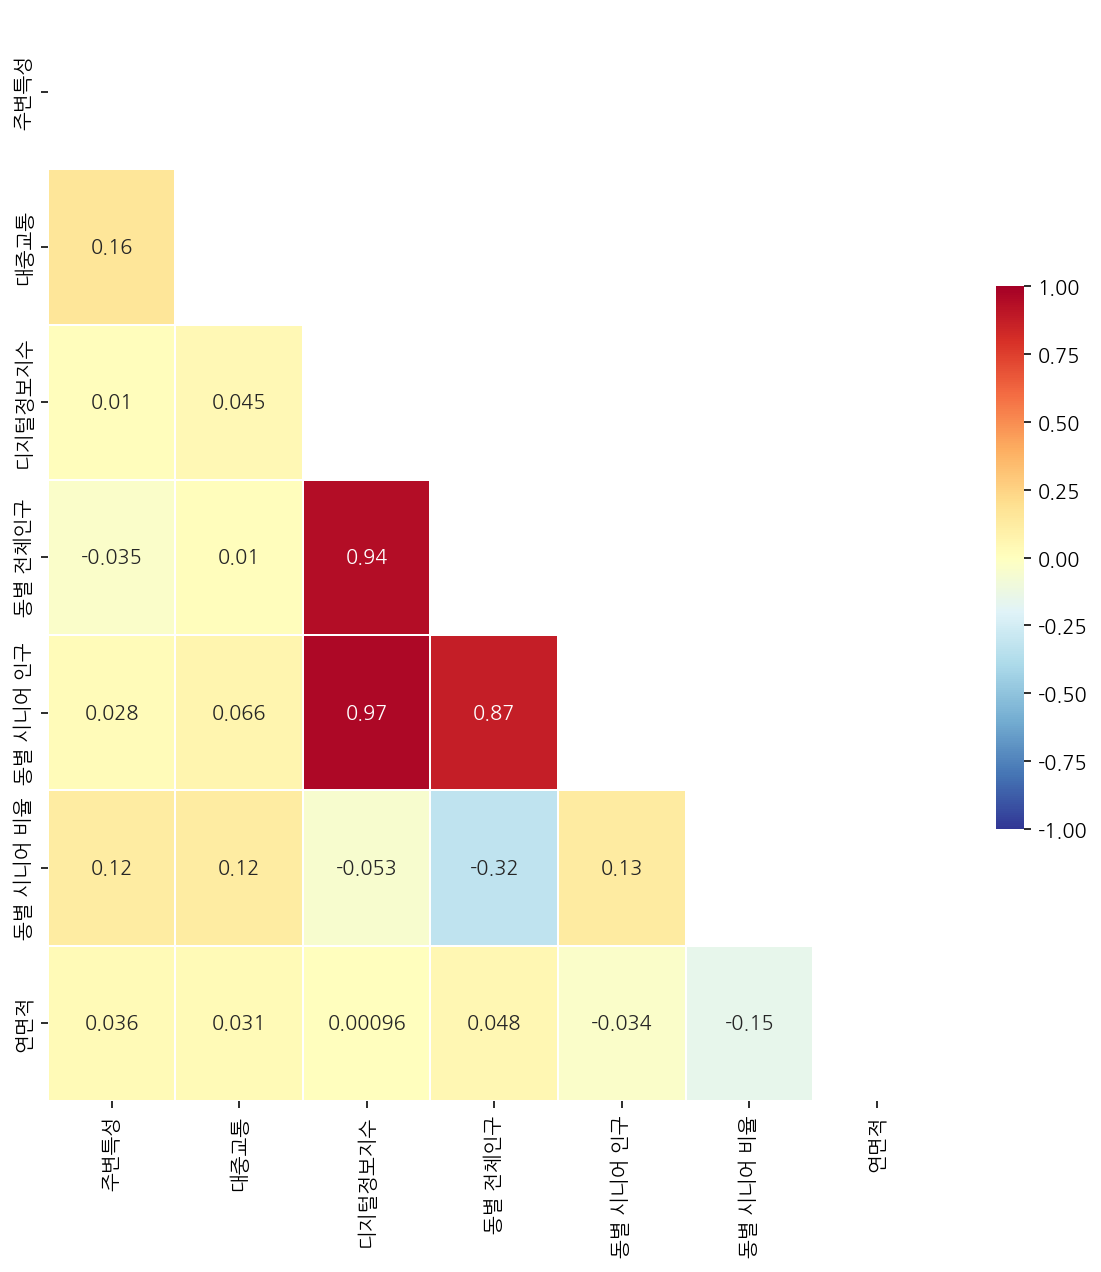

In [10]:
# 상관관계 히트맵

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(10, 10))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형은 False)
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(df_corr,
               annot=True,
               cmap='RdYlBu_r',
               mask=mask,                # 표시하지 않을 마스크 부분 지정
               linewidths=.5,            # 경계면 실선으로 구분
               cbar_kws={"shrink": .5},  # 컬러바 크기 절반으로 줄이기
               vmin=-1, vmax=1
               )
plt.show()

- '디지털정보지수' 변수 자체가, 동별 연령별 인구 데이터를 기반으로 만든 것으로, 두 변수의 상관관계는 높을 수 밖에 없다.
- 동별 전체인구와 동별시니어비율은 음의 상관관계를 가지는데, 동별 전체인구가 많을 수록 시니어의 비율은 낮아질수밖에 없기 때문이다.
- 그 외에는 크게 유의미한 상관관계를 가진 변수는 없다.

# Standard Scale

In [6]:
# StandardScaler정규화를 진행

scaled_data = StandardScaler().fit_transform(data_num)
df_scaled=pd.DataFrame(data=scaled_data, columns=data_num.columns)
df_scaled.head()

,주변특성,대중교통,디지털정보지수,동별 전체인구,동별 시니어 인구,동별 시니어 비율,연면적
0,-0.896915,-0.367566,-1.193992,-1.151278,-1.145429,-0.096125,-0.570746
1,1.969608,-0.367566,-1.437504,-1.440110,-1.362572,0.259217,-0.923415
2,2.925115,2.262783,-1.474265,-1.681173,-1.265154,2.482728,0.007986
3,0.058592,0.947608,-2.211242,-2.206636,-2.109601,1.751938,-0.552180
4,0.058592,0.290021,-2.014321,-2.025755,-1.947085,0.793965,-0.532816


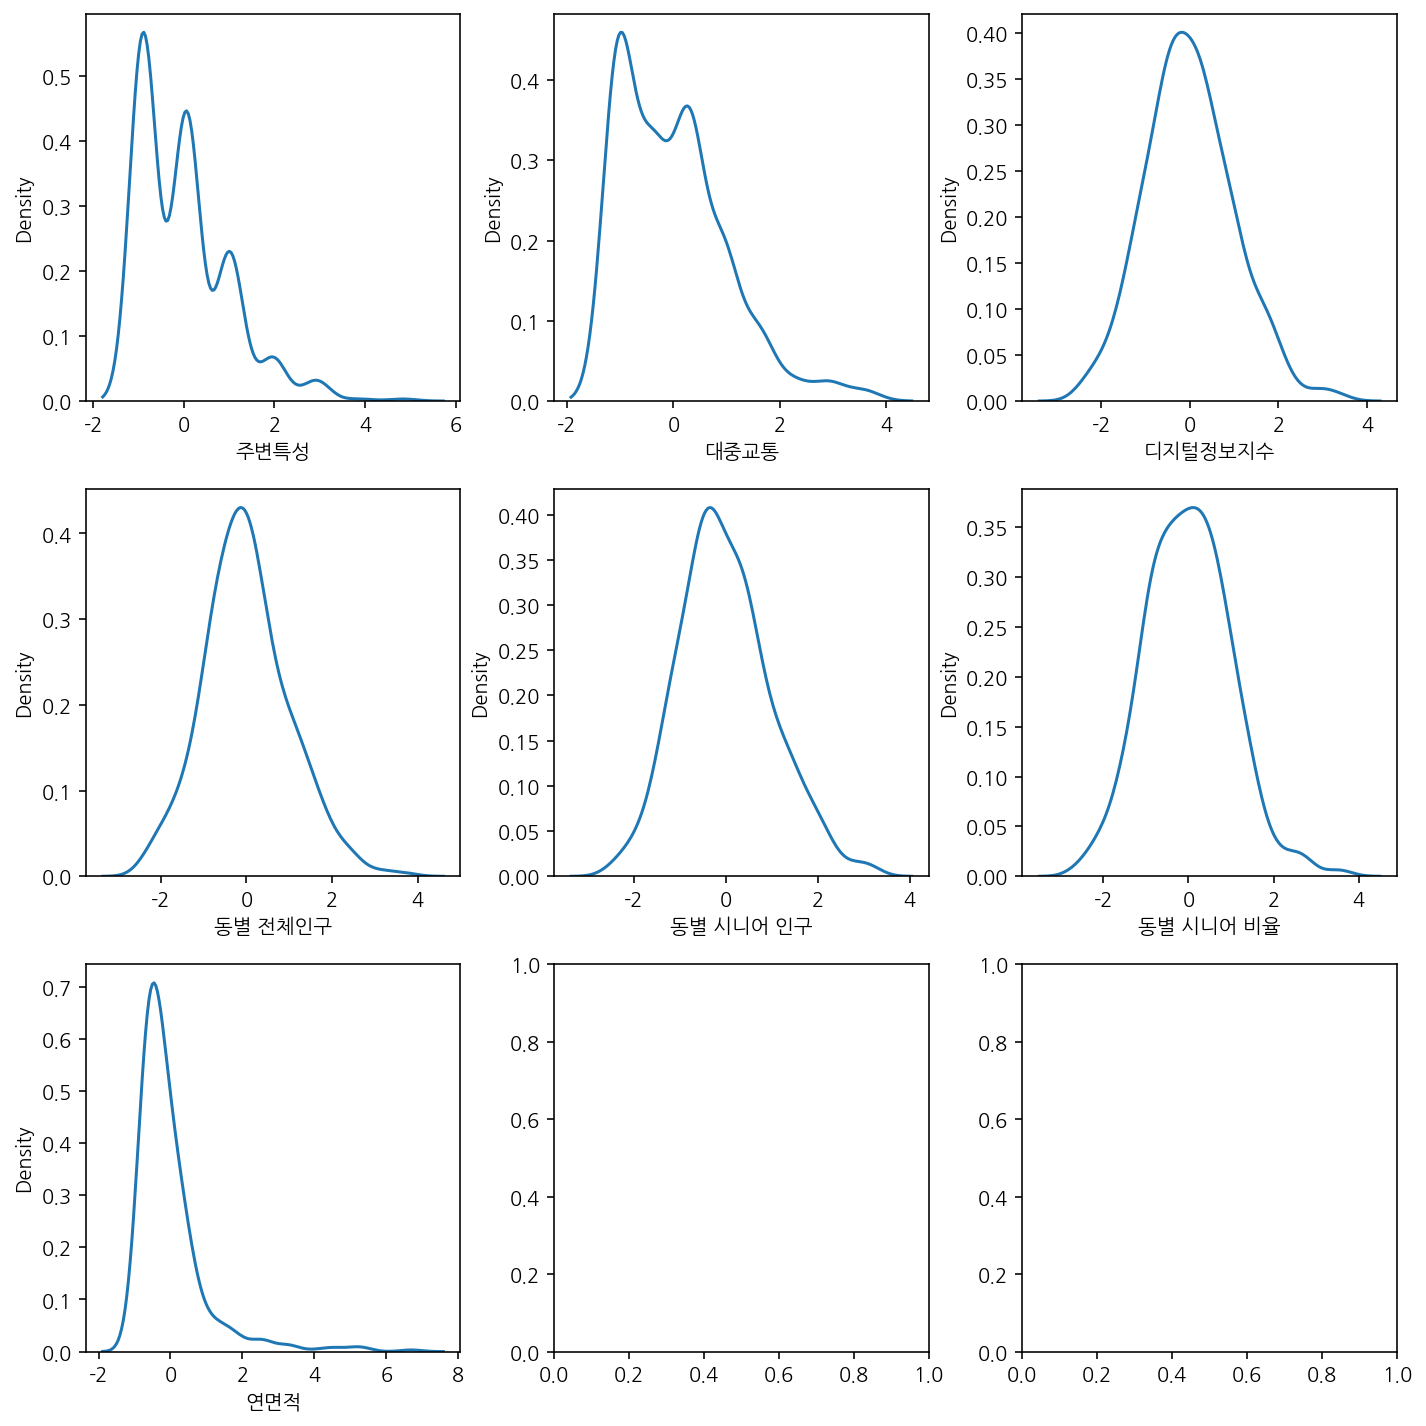

In [7]:
# 표준화 후, 분포 다시 확인
fig, ax = plt.subplots(3,3, figsize=(10,10))
for i, valu in enumerate(df_scaled):
    m = i//3
    n = i % 3
    sns.kdeplot(x =valu, data = df_scaled, ax=ax[m,n])

plt.tight_layout()
plt.show()

- 스케일링 후에도 분포상의 큰 변화는 없다.
- 하지만 올바른 모델링을 위해선, 변수마다 스케일이 너무 다를경우 제대로 학습이 안된다.
- 따라서 스케일링은 모델링 전에 필수이다.

# Sparse PCA

- Sparse PCA는 다변량 데이터에서 많이 쓰는 차원축소 방법.
    - 고차원 데이터의 최대 분산 방향을 찾아 새로운 공간에서 저차우너으로 투영하는 PCA에, 추가적인 규제(Ridge, Lasso)를 주는 방식. 
    - 모든 변수의 linear 조합으로 만들어지는 PCA와 달리, 몇 개의 변수 조합만을 이용하기 때문에 해석에 용이하다는 장점이 있음.
- 처음에 PCA를 했다가, 결과에 대한 해석이 안됐다. 또한 PCA는 변수간 상관관계가 높은 변수들을 축소하여 새로운 변수로 만드는데, 우리 데이터의 변수들은 상관관계가 거의 없었다.
- 클러스터링을 해야하는데, 어떤 변수가 유의미한지, 어떤 변수로 해야하는지 판단이 어려웠다. 이에 유사한 다른 프로젝트가 사용한 Sparse PCA를 모방하여 사용했다. 
- Sparse PCA에 대한 정확한 이해없이 사용한 점이 아쉬운 점이다.

In [11]:
from sklearn.decomposition import SparsePCA

In [13]:
spca_data = df_scaled.copy()
spca_data = spca_data.drop(columns='연면적') 
# 연면적은 입지선정의 핵심변수가 아닌, 고려변수라고 생각하여 모델링에서 제외.

In [14]:
spca = SparsePCA()
spca = spca.fit_transform(spca_data)
explained_variance = np.var(spca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(explained_variance)
print(explained_variance_ratio)
print(np.cumsum(explained_variance_ratio))

[1.37912584 0.24751863 0.98029605 0.24751863 1.1316207  0.98029605]
[0.2776926  0.04983888 0.1973866  0.04983888 0.22785643 0.1973866 ]
[0.2776926  0.32753148 0.52491808 0.57475697 0.8026134  1.        ]


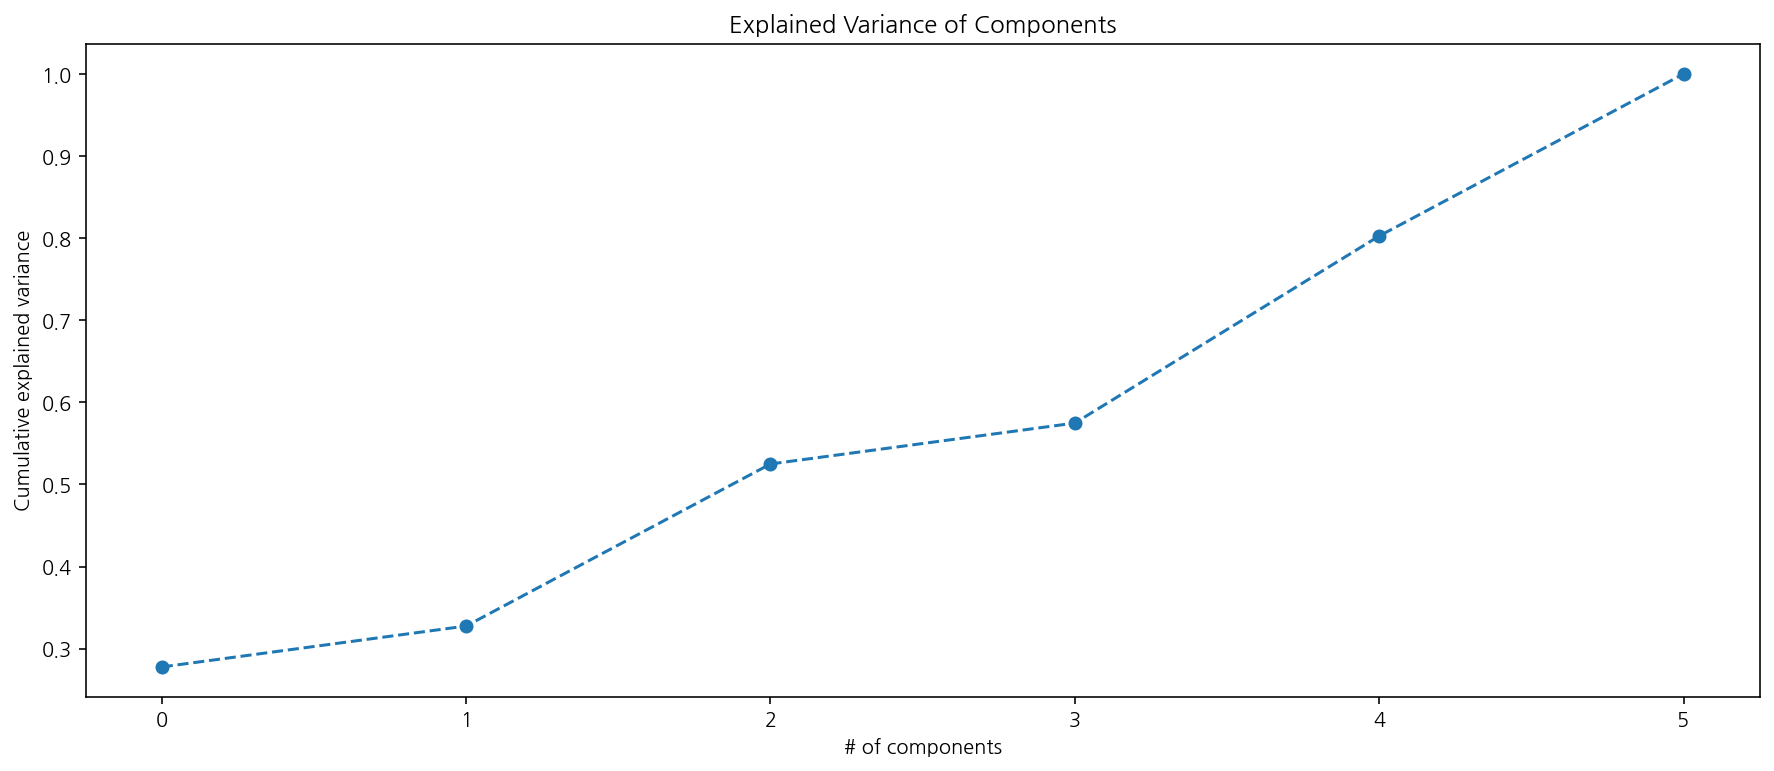

In [15]:
plt.figure(figsize = (15,6))

plt.plot(range(np.cumsum([e for e in explained_variance_ratio if e !=0]).shape[0]), 
         np.cumsum([e for e in explained_variance_ratio if e !=0]), marker = 'o', linestyle = '--')

plt.title('Explained Variance of Components')
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [16]:
# 각 컴포넌트의 분산비율, 설명력이 가장 높은 알파값 alpha = 2.79593을 대입. (하이퍼 파라미터 튜닝)
spca = SparsePCA(n_components = 5, alpha = 2.79593, random_state=42)
principlecomponents = spca.fit_transform(spca_data)

spca_components = pd.DataFrame(spca.components_, columns = list(spca_data.columns))
spca_components

,주변특성,대중교통,디지털정보지수,동별 전체인구,동별 시니어 인구,동별 시니어 비율
0,0.0,0.0,0.554781,0.000000,0.831997,0.0
1,1.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,1.0
3,0.0,1.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.331546,0.943439,0.000000,0.0


In [17]:
# SPCA축의 가장 중요한 변수
n_pcs= spca.components_.shape[0]
most_important = [np.abs(spca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = spca_data.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

df = pd.DataFrame(dic.items())
df.columns = ['spca','element']
df['value']=None
for i in range(len(df)):
    a = df['element'][i]
    df['value'][i] = spca_components[a][i]
    
df

,spca,element,value
0,PC1,동별 시니어 인구,0.831997
1,PC2,주변특성,1.0
2,PC3,동별 시니어 비율,1.0
3,PC4,대중교통,1.0
4,PC5,동별 전체인구,0.943439


In [19]:
# df_scaled.to_excel('/content/drive/MyDrive/PROJECT_senior it support center/데이터/df_scaled.xlsx')